#  To perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [9]:
df.shape

(1436, 11)

In [4]:
# Summary statistics
summary_stats = df.describe()

summary_stats


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
data_types = df.dtypes
data_types

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Percentage of Diesel: 10.79%
Average price of Diesel: $11294.55
Percentage of Petrol: 88.02%
Average price of Petrol: $10679.31
Percentage of CNG: 1.18%
Average price of CNG: $9421.18


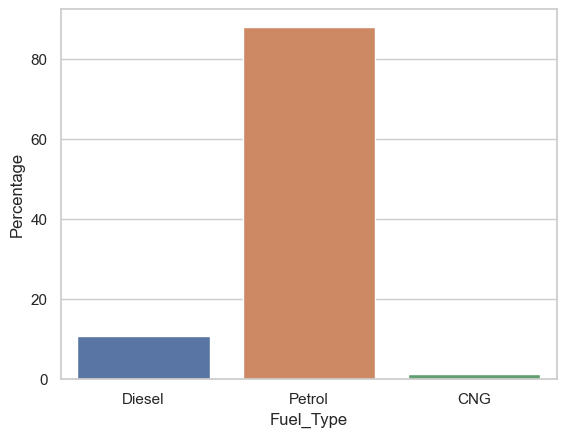

In [25]:
# Calculate and print percentages for each fuel type
percentages = []  # Store percentages for plotting
avg_prices = []  # Store average prices for plotting
for fuel_type in df['Fuel_Type'].unique():
    percentage = (df['Fuel_Type'] == fuel_type).mean() * 100
    percentages.append(percentage)  # Append to list
    print(f"Percentage of {fuel_type}: {percentage:.2f}%")

    # Print average price for the fuel type
    avg_price = df['Price'][df['Fuel_Type'] == fuel_type].mean()
    avg_prices.append(avg_price)  # Append to list
    print(f"Average price of {fuel_type}: ${avg_price:.2f}")

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({'Fuel_Type': df['Fuel_Type'].unique(), 'Percentage': percentages, 'Average_Price': avg_prices})

# Create the bar plot using the new DataFrame
sns.barplot(x='Fuel_Type', y='Percentage', data=plot_df)
plt.show() 

Percentage of Diesel: 10.79%
Average price of Diesel: $11294.55
Percentage of Petrol: 88.02%
Average price of Petrol: $10679.31
Percentage of CNG: 1.18%
Average price of CNG: $9421.18


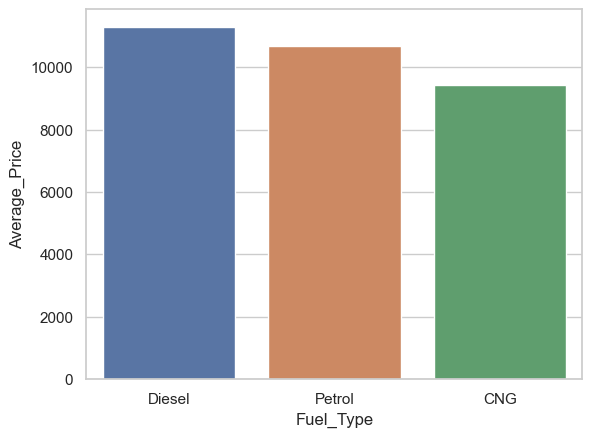

In [24]:




# Calculate and print percentages for each fuel type
percentages = []  # Store percentages for plotting
avg_prices = []  # Store average prices for plotting
for fuel_type in df['Fuel_Type'].unique():
    percentage = (df['Fuel_Type'] == fuel_type).mean() * 100
    percentages.append(percentage)  # Append to list
    print(f"Percentage of {fuel_type}: {percentage:.2f}%")

    # Print average price for the fuel type
    avg_price = df['Price'][df['Fuel_Type'] == fuel_type].mean()
    avg_prices.append(avg_price)  # Append to list
    print(f"Average price of {fuel_type}: ${avg_price:.2f}")

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({'Fuel_Type': df['Fuel_Type'].unique(), 'Percentage': percentages, 'Average_Price': avg_prices})

# Create the bar plot using the new DataFrame
sns.barplot(x='Fuel_Type', y='Percentage', data=plot_df)
sns.barplot(x='Fuel_Type', y='Average_Price', data=plot_df)
plt.show()  # Display the plot

In [32]:
# Check the existing columns in your DataFrame
print(df.columns)

# Correct any typos in column names or remove non-existent columns from the list
columns_to_drop = ['Mfg_Year', 'Weight', 'Cylinders']  # Example with potential corrections 

# Drop the columns, ensuring they exist
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print("Dropped columns:", existing_columns_to_drop)
else:
    print("No matching columns to drop.")

df.head() # Display the first few rows of the modified DataFrame

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Cylinders'],
      dtype='object')
Dropped columns: ['Cylinders']


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc
0,13500,23,46986,Diesel,90,0,2000
1,13750,23,72937,Diesel,90,0,2000
2,13950,24,41711,Diesel,90,0,2000
3,14950,26,48000,Diesel,90,0,2000
4,13750,30,38500,Diesel,90,0,2000


/Users/vaishanavipurohit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


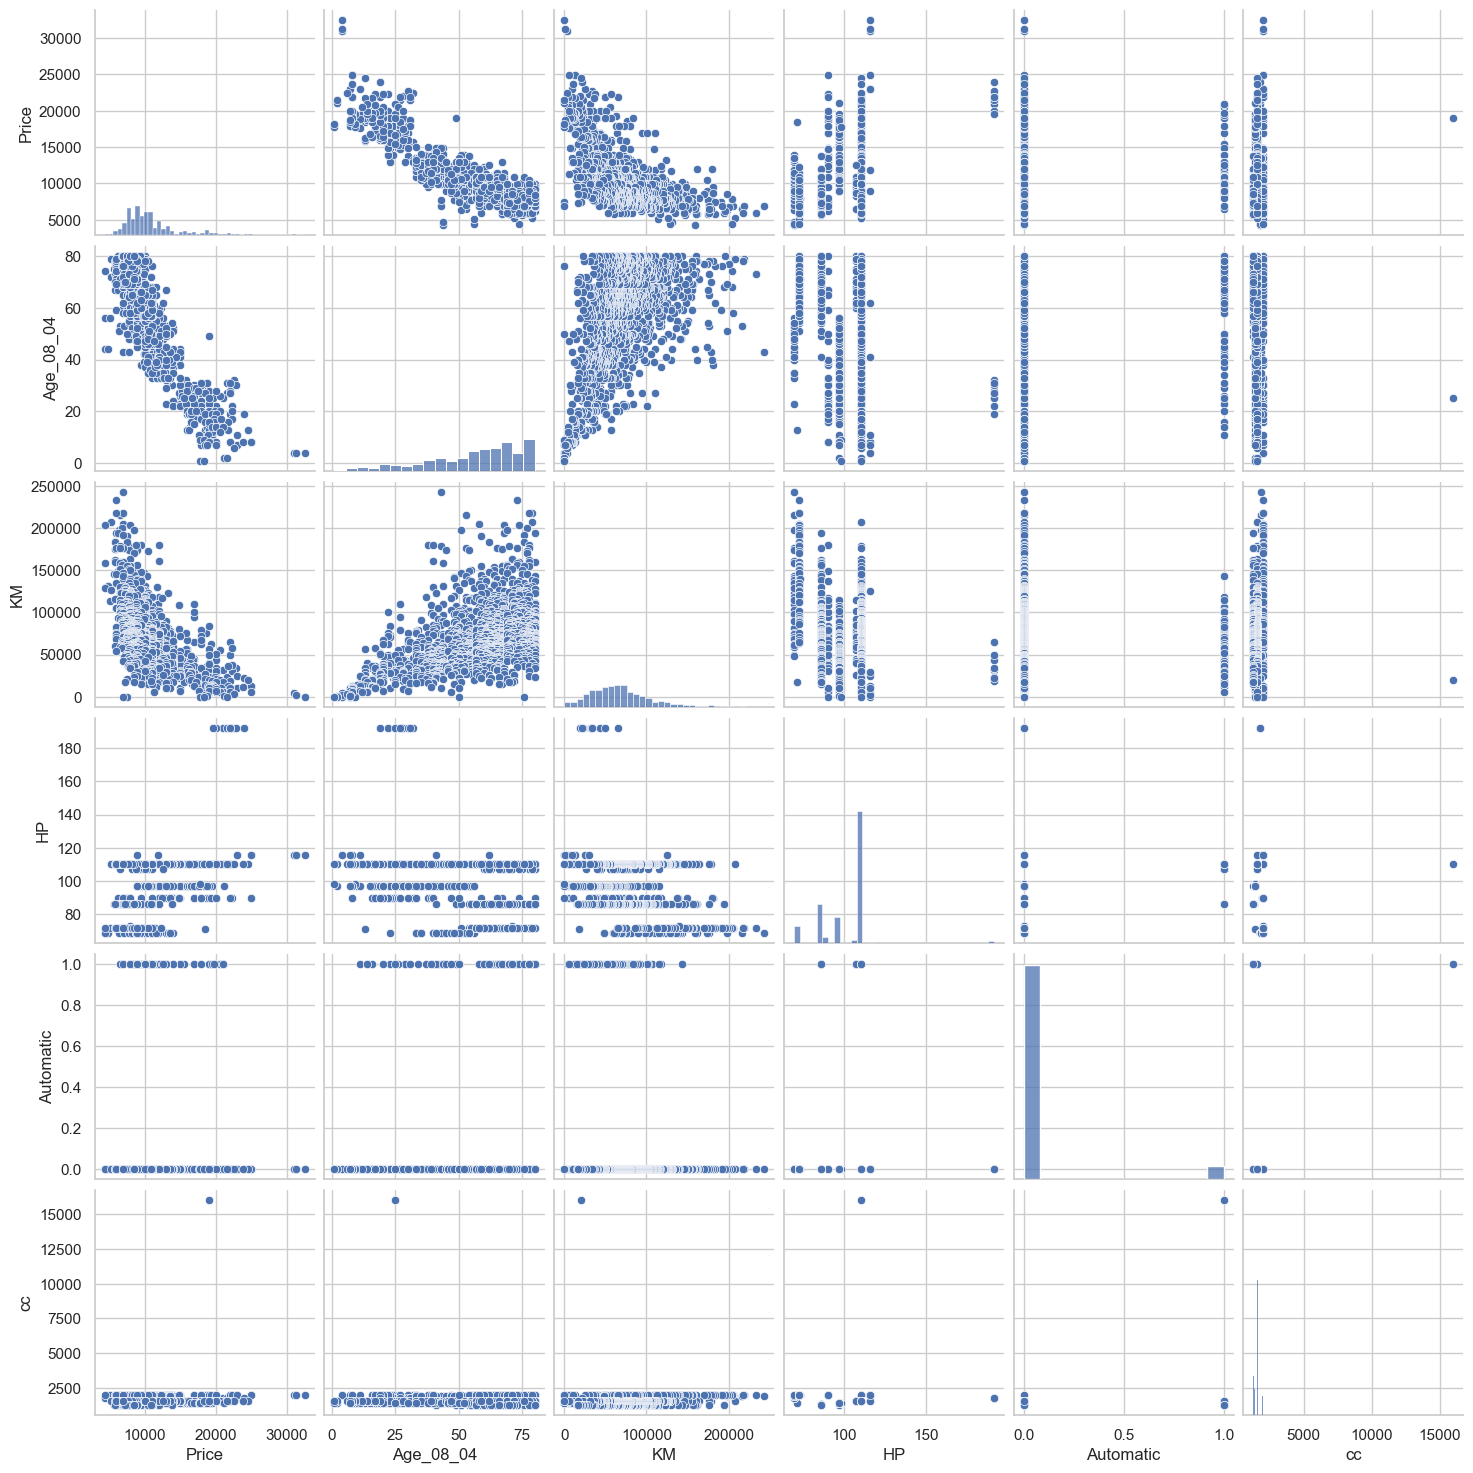

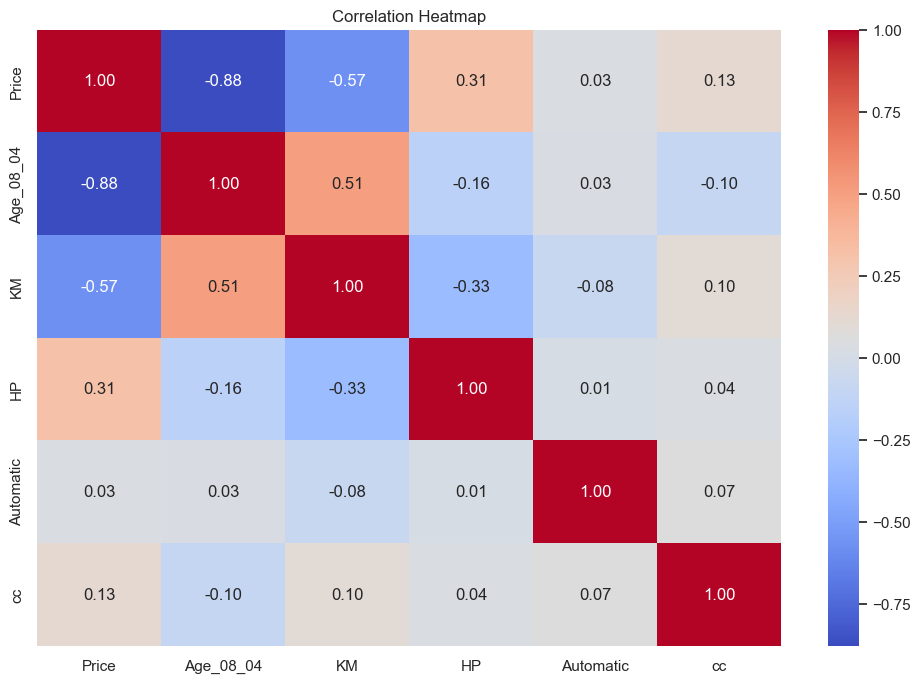

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style of the visualization
sns.set(style="whitegrid")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Pair plot to visualize relationships between numeric variables
sns.pairplot(numeric_df)
plt.show()

# Heatmap for correlation of numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Convert categorical variable 'FuelType' to dummy variables
# Check if the column exists before applying get_dummies
if 'Fuel_Type' in df.columns:
    df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
    print("Created dummy variables for 'Fuel_Type'")
else:
    print("'Fuel_Type' column not found in the DataFrame.")

# Display the first few rows of the modified dataset
df.head()


Created dummy variables for 'Fuel_Type'


,Price,Age_08_04,KM,HP,Automatic,cc,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,True,False
1,13750,23,72937,90,0,2000,True,False
2,13950,24,41711,90,0,2000,True,False
3,14950,26,48000,90,0,2000,True,False
4,13750,30,38500,90,0,2000,True,False


In [36]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop(columns='Price')
y = df['Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Get the coefficients
coefficients = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
Age_08_04,-141.101901
KM,-0.018322
HP,55.440706
Automatic,876.004307
cc,0.039248
Fuel_Type_Diesel,2726.429846
Fuel_Type_Petrol,618.243439


In [38]:
# Add interaction terms (example: Age*KM)
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

# Initialize and fit the model
mlr_interaction = LinearRegression()
mlr_interaction.fit(X_train, y_train)

# Get the coefficients
coefficients_interaction = pd.DataFrame(mlr_interaction.coef_, X_train.columns, columns=['Coefficient'])
coefficients_interaction

,Coefficient
Age_08_04,-177.194189
KM,-0.066192
HP,54.596055
Automatic,874.645454
cc,-0.001499
Fuel_Type_Diesel,2572.140410
Fuel_Type_Petrol,365.065120
Age_KM,0.000790


In [42]:
!pip install --upgrade scikit-learn

from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (example: degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and fit the model
mlr_poly = LinearRegression()
mlr_poly.fit(X_train_poly, y_train)

# Get the coefficients
# Use get_feature_names_out() for scikit-learn versions 0.24 and above
coefficients_poly = pd.DataFrame(mlr_poly.coef_, poly.get_feature_names_out(X_train.columns), columns=['Coefficient'])
coefficients_poly




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 107.0 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0

[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


,Coefficient
Age_08_04,-2.615703e+02
KM,-1.075493e-01
HP,3.210588e+02
Automatic,3.228914e+01
cc,-8.255647e+00
Fuel_Type_Diesel,-4.730848e+03
Fuel_Type_Petrol,4.722218e+03
Age_KM,1.284364e-03
Age_08_04^2,1.569050e+00
Age_08_04 KM,9.428097e-04


In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for each model
y_pred_mlr = mlr.predict(X_test.drop(columns=['Age_KM'])) # Drop the 'Age_KM' column for consistency
y_pred_interaction = mlr_interaction.predict(X_test)
y_pred_poly = mlr_poly.predict(X_test_poly)

# Evaluation metrics
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

evaluation_metrics = pd.DataFrame({
    'Model': ['Basic MLR', 'MLR with Interaction', 'MLR with Polynomial'],
    'MSE': [mse_mlr, mse_interaction, mse_poly],
    'R2': [r2_mlr, r2_interaction, r2_poly]
})

evaluation_metrics


,Model,MSE,R2
0,Basic MLR,2.157398e+06,0.838310
1,MLR with Interaction,1.763788e+06,0.867810
2,MLR with Polynomial,1.572206e+06,0.882168


In [45]:
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Get the coefficients
# Use X_train.columns since this is what the model was trained on
coefficients_lasso = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficient']) 
print(coefficients_lasso)

# Predictions and evaluation metrics
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(mse_lasso, r2_lasso)

                  Coefficient
Age_08_04         -177.185466
KM                  -0.066358
HP                  54.269257
Automatic          852.209127
cc                   0.003383
Fuel_Type_Diesel  2414.481909
Fuel_Type_Petrol   221.535697
Age_KM               0.000791
1764291.3162685027 0.8677719225766429
